# Exploring and preprocessing datasets


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Members' details

> User information. Note that not every user in the dataset is available.

>* msno - user ID
>* city
>* bd: age. Note: this column has outlier values ranging from -7000 to 2015, please use your judgement.
>* gender
>* registered_via: registration method
>* registration_init_time: format `%Y%m%d`
>* expiration_date: format `%Y%m%d`, taken as a snapshot at which the member.csv is extracted. Not representing the actual churn behavior.


In [2]:
members = pd.read_csv("data/members_v3.csv")

members_col_names = {
    "msno": "user_id",
    "bd": "age"
}

members.rename(members_col_names, axis=1, inplace=True)

members.head()

,user_id,city,age,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


Problems with the dataset:
* columns `city` and `registered_via` are not actual numeric vectors, therefore they should be treated as a categorical feature and/or be encoded
* age has unrealistic values, raging from -7168 to 2016
* gender has missing values
* column `registration_init_time` should be treated as a date

### Problem 1: Potentially non-numeric columns

First, I'm going to investigate how many values are there in each of the columns:

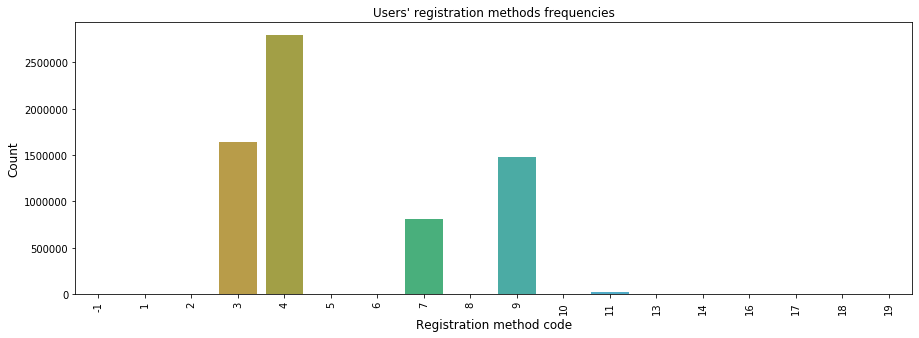

In [3]:
# Registration method count
city_order = sorted(members["registered_via"].unique())

plt.figure(figsize=(15,5))
sns.countplot(x="registered_via", data=members, order=city_order)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Registration method code", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Users' registration methods frequencies", fontsize=12)
plt.show()

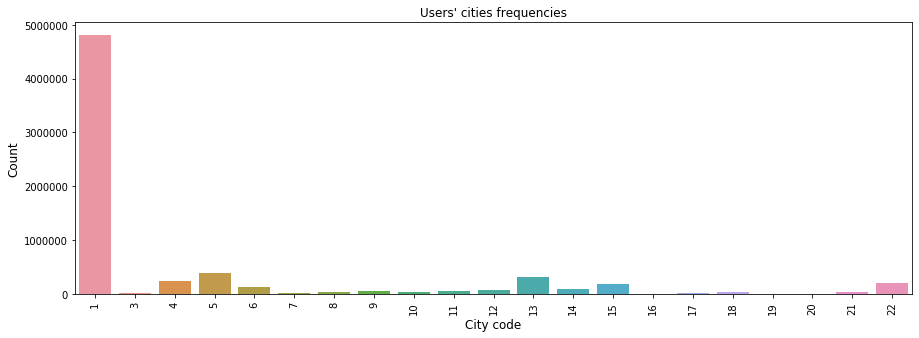

In [4]:
# City count
city_order = sorted(members['city'].unique())

plt.figure(figsize=(15,5))
sns.countplot(x="city", data=members, order = city_order)
plt.ylabel("Count", fontsize=12)
plt.xlabel("City code", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Users' cities frequencies", fontsize=12)
plt.show()

Since both of those columns contain a limited set of values, it might be wise to encode them using one-hot encoding.

In [5]:
# First, change column data types to decrease memory use
members.city = members.city.astype(np.uint8)
members.registered_via = members.registered_via.astype(np.uint8)

# Use dummy variables for registration methods and cities

In [6]:
members = pd.get_dummies(members, columns=["city", "registered_via"])

### Problem 2: Unrealistic age values 

In [7]:
print(members["age"].describe())
members.age.value_counts()

count    6.769473e+06
mean     9.795794e+00
std      1.792590e+01
min     -7.168000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      2.100000e+01
max      2.016000e+03
Name: age, dtype: float64


 0      4540215
 22      112200
 21      110574
 20      110452
 27      102769
         ...   
 919          1
 920          1
 923          1
 925          1
-5            1
Name: age, Length: 386, dtype: int64

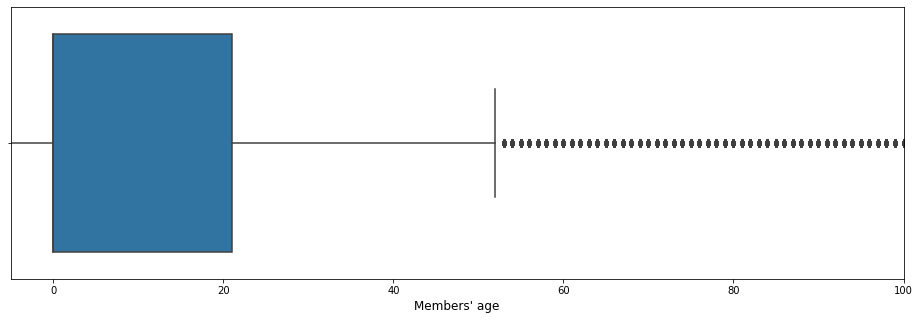

In [8]:
plt.figure(figsize=(16,5))
sns.boxplot(members.age)
plt.xlim(-5, 100)
plt.xlabel("Members' age", fontsize=12)
plt.show()

Since the dataset presents some unrealistic values (including negative and really large values), and the median of the column is 0 years old, I decided to not use this column in further considerations.

In [9]:
members.drop("age", axis=1, inplace=True)

### Problem 3: Missing gender data

In [10]:
# What percentage of all values is undefined?
print(f'{(members["gender"].isna().sum() / len(members["gender"])):.2%} of users did not specify their gender')

65.43% of users did not specify their gender


Since the fraction of missing data is really high, I decided to treat NAs as a third categorical value ("unknown"), instead of dropping missing values.

In [11]:
members["gender"].replace(np.nan, "unknown", inplace=True)

Now, just as before, I encode this column using one-hot encoding.

In [12]:
members = pd.get_dummies(members, columns=["gender"])

### Problem 4: Date columns

In [13]:
# Changing date time column to the appropriate type
members["registration_init_time"] = pd.to_datetime(members["registration_init_time"], format='%Y%m%d')

### Final `members` dataset

In [14]:
members.head()

,user_id,registration_init_time,city_1,city_3,city_4,city_5,city_6,city_7,city_8,city_9,...,registered_via_13,registered_via_14,registered_via_16,registered_via_17,registered_via_18,registered_via_19,registered_via_255,gender_female,gender_male,gender_unknown
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,2011-09-11,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,2011-09-14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,2011-09-15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,2011-09-15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,2011-09-15,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Transactions

Transactions of users up until until 3/31/2017.

* msno: user id
* payment_method_id: payment method
* payment_plan_days: length of membership plan in days
* plan_list_price: in New Taiwan Dollar (NTD)
* actual_amount_paid: in New Taiwan Dollar (NTD)
* is_auto_renew
* transaction_date: format `%Y%m%d`
* membership_expire_date: format `%Y%m%d`
* is_cancel: whether or not the user canceled the membership in this transaction.


In [15]:
transactions = pd.read_csv("data/transactions_v2.csv")
transaction_col_names = {
    "msno": "user_id",
    "payment_plan_days": "purchased_membership_length_days",
    "plan_list_price": "price_ntd",
    "actual_amount_paid": "amount_paid_ntd",
    "is_calcel": "is_cancelling"
}

transactions.rename(transaction_col_names, axis=1, inplace=True)
transactions.head()

,user_id,payment_method_id,purchased_membership_length_days,price_ntd,amount_paid_ntd,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


### Change data types to decrease memory use

In [16]:
transactions["is_cancel"] = transactions.is_cancel.astype(np.uint8)
transactions["is_auto_renew"] = transactions.is_auto_renew.astype(np.uint8)
transactions["payment_method_id"] = transactions.payment_method_id.astype(np.uint8)
transactions["purchased_membership_length_days"] = transactions.purchased_membership_length_days.astype(np.uint16)
transactions["price_ntd"] = transactions.price_ntd.astype(np.uint16)
transactions["amount_paid_ntd"] = transactions.amount_paid_ntd.astype(np.uint16)
transactions["transaction_date"] = pd.to_datetime(transactions.transaction_date, format='%Y%m%d')
transactions["membership_expire_date"] = pd.to_datetime(transactions.membership_expire_date, format='%Y%m%d')
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
user_id                             1431009 non-null object
payment_method_id                   1431009 non-null uint8
purchased_membership_length_days    1431009 non-null uint16
price_ntd                           1431009 non-null uint16
amount_paid_ntd                     1431009 non-null uint16
is_auto_renew                       1431009 non-null uint8
transaction_date                    1431009 non-null datetime64[ns]
membership_expire_date              1431009 non-null datetime64[ns]
is_cancel                           1431009 non-null uint8
dtypes: datetime64[ns](2), object(1), uint16(3), uint8(3)
memory usage: 45.0+ MB


Check whether all users mentioned in transactions are available in our database:

In [17]:
unique_transactions_user_count = transactions["user_id"].nunique()
print(f"Unique users in transaction database: {unique_transactions_user_count:,}")

Unique users in transaction database: 1,197,050


In [19]:
member_transactions = transactions.merge(members, on="user_id", how="inner")

In [20]:
unique_member_transactions_user_count = member_transactions["user_id"].nunique()
print(f"Number of users after merging: {unique_member_transactions_user_count:,}")
user_difference = unique_transactions_user_count - unique_member_transactions_user_count
print(f"Number of users missing from the members database: "
      f"{user_difference}")
print(f"Fraction of users missing: {user_difference / unique_transactions_user_count:.2%}")

Number of users after merging: 1,077,434
Number of users missing from the members database: 119616
Fraction of users missing: 9.99%


Since the number of user details missing from the `members` database is only 10%, I decided to carry on and examine users with full background information available (dropping users with missing data).

### Time passed since registration

In [21]:
member_transactions["time_since_registration"] = (
    member_transactions["transaction_date"] -
    member_transactions["registration_init_time"]
).astype("timedelta64[D]").astype("uint16")

member_transactions.drop(["membership_expire_date", "transaction_date", "registration_init_time"], axis=1, inplace=True)

### Discount column

Since there are two different prices available: `price_ntd` and `amount_paid_ntd`, I decided to add a helper column with the discount applied during the purchase.

In [22]:
# Discount
member_transactions["discount"] = member_transactions["price_ntd"] - member_transactions["amount_paid_ntd"]
member_transactions["is_discount"] = (member_transactions["discount"] > 0).astype(np.uint8)

I'm saving the processed data into a CSV file for easier access later on.

In [23]:
member_transactions.to_csv("data/processed_member_transactions.csv", index=False)

## Churn data - train dataset

In [25]:
churn = pd.read_csv("data/train_v2.csv")
churn.rename({"msno": "user_id"}, axis=1, inplace=True)
churn["is_churn"] = churn.is_churn.astype(np.uint8)
churn.head()

,user_id,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [26]:
kkbox = churn.merge(member_transactions, on="user_id", how="inner")
kkbox.drop_duplicates(inplace=True)

## Percent of churned users

In [27]:
churn_rates = kkbox.groupby("is_churn").user_id.nunique()
churn_rates

is_churn
0    771591
1     53777
Name: user_id, dtype: int64

In [29]:
churned_count = churn_rates[1]
not_churned_count = churn_rates[0]
print(f"Fraction of churned users: {churned_count / (not_churned_count + churned_count):.2%}")

Fraction of churned users: 6.52%


Since churned users subsitute for less than 7% of the training data, the dataset is imbalanced. This means that by doing a guess in which you assume no of the users churned, you will automatically get an accuracy of 93%. This makes it especially important to use different model evaluation metrics.

In [30]:
random_guess_accuracy = not_churned_count / (not_churned_count + churned_count)
print(f"Random guess accuracy: {random_guess_accuracy:.2%}%")

Random guess accuracy: 93.48%%
